In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
import random
import numpy as np

In [2]:
import os
import numpy as np

if "M" not in globals() or "y" not in globals():
    if os.path.isdir("numbers") and len(os.listdir("numbers")) > 0:
        pass
    else:
        from sklearn.datasets import load_digits
        _d = load_digits()
        M = _d.images
        y = _d.target


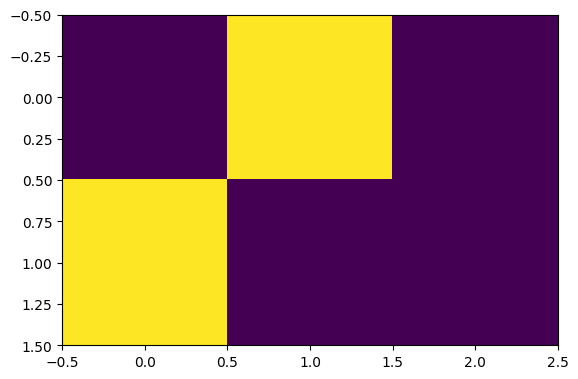

In [3]:
M_example = np.array([[0, 1, 0], [1, 0, 0]])
plt.imshow(M_example)

In [4]:
M_example.flatten()

array([0, 1, 0, 1, 0, 0])

In [5]:
folder = 'numbers' # Carpeta que contiene mis dibujos.
img = cv2.imread(f'{folder}/1_17.jpg')

[ WARN:0@0.725] global loadsave.cpp:268 findDecoder imread_('numbers/1_17.jpg'): can't open/read file: check file path/integrity


In [6]:
if 'img' in globals() and img is None:
    print('Image not available at the specified path; display step skipped.')
else:
    plt.imshow(img)
    plt.show()


Image not available at the specified path; display step skipped.


In [7]:
if 'img' in globals() and img is None:
    print('Image not available at the specified path; display step skipped.')
else:
    angle = 30
    angle = int(random.uniform(-angle, angle))
    if angle < 10:
        angles = 30
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img2 = cv2.warpAffine(img, M, (w, h), borderValue=(156,156,156))
    plt.imshow(img2)
    plt.show()


Image not available at the specified path; display step skipped.


In [8]:
if 'img' in globals() and img is None:
    print('Image not available at the specified path; display step skipped.')
else:
    M = []
    y = []
    for root, dirs, files in os.walk(folder, topdown=False):
        for name in files:
            # Agregamos imágenes originales
            path = os.path.join(root, name)
            matrix = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            y.append(path.split('/')[1].split('_')[0])
            M.append(matrix)
            # Agregamos imágenes rotadas
            angle = 30
            angle = int(random.uniform(-angle, angle))
            if angle < 10:
                angles = 10
            h, w = matrix.shape[:2]
            M_rot = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
            matrix2 = cv2.warpAffine(matrix, M_rot, (w, h), borderValue=(156,156,156))
            y.append(path.split('/')[1].split('_')[0])
            M.append(matrix2)


Image not available at the specified path; display step skipped.


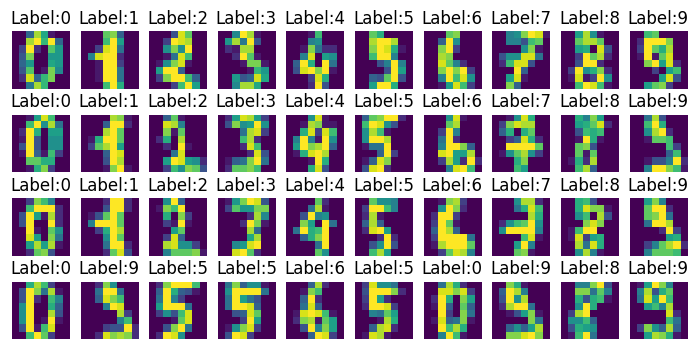

In [9]:
h, w = 4, 10
fig = plt.figure(figsize=(w, h))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
for i in range(w*h):
    fig.add_subplot(h, w, i + 1).set_title(f'Label:{y[i]}')
    ax = plt.imshow(M[i])    
    plt.axis('off')
plt.show()

In [10]:
X = []
for i in range(len(M)):
    X.append(M[i].flatten())

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 500)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

In [15]:
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.94      0.97      0.96        35
           2       1.00      0.94      0.97        36
           3       0.97      1.00      0.98        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.92      0.96        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [16]:
M_real = []
y_real = []
test_folder = 'test'
for root, dirs, files in os.walk(test_folder, topdown=False):
    for name in files:
        path = os.path.join(root, name)
        matrix = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        y_real.append(path.split('/')[1].split('_')[0])
        M_real.append(matrix)
print(y_real)

[]


In [17]:
import numpy as np
if 'M_real' not in globals() or M_real is None or len(M_real)==0:
    print('No inference samples available; skipping.')
else:
    X_real = []
    for i in range(len(M_real)):
        X_real.append(M_real[i].flatten())
    y_pred = clf.predict(X_real)


No inference samples available; skipping.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
if 'M_real' not in globals() or M_real is None or len(M_real)==0:
    print('No external images available for visualization; skipping.')
else:
    h, w = 2, 4
    fig = plt.figure(figsize=(w, h))
    safe_n = min(w*h, len(M_real))
    for i in range(safe_n):
        fig.add_subplot(h, w, i + 1).set_title(f'Pred:{y_pred[i]}' if 'y_pred' in globals() and len(y_pred)>i else 'Pred')
        plt.imshow(M_real[i])
        plt.axis('off')
    plt.show()


No external images available for visualization; skipping.


In [19]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)

clf_NB = GaussianNB()
clf_LD = LinearDiscriminantAnalysis()
clf_QD = QuadraticDiscriminantAnalysis()

In [20]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [21]:
list(data.target_names)

['malignant', 'benign']

In [22]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target).rename(columns={0:'Diagnosis'})
df = pd.concat([df, target], axis=1)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


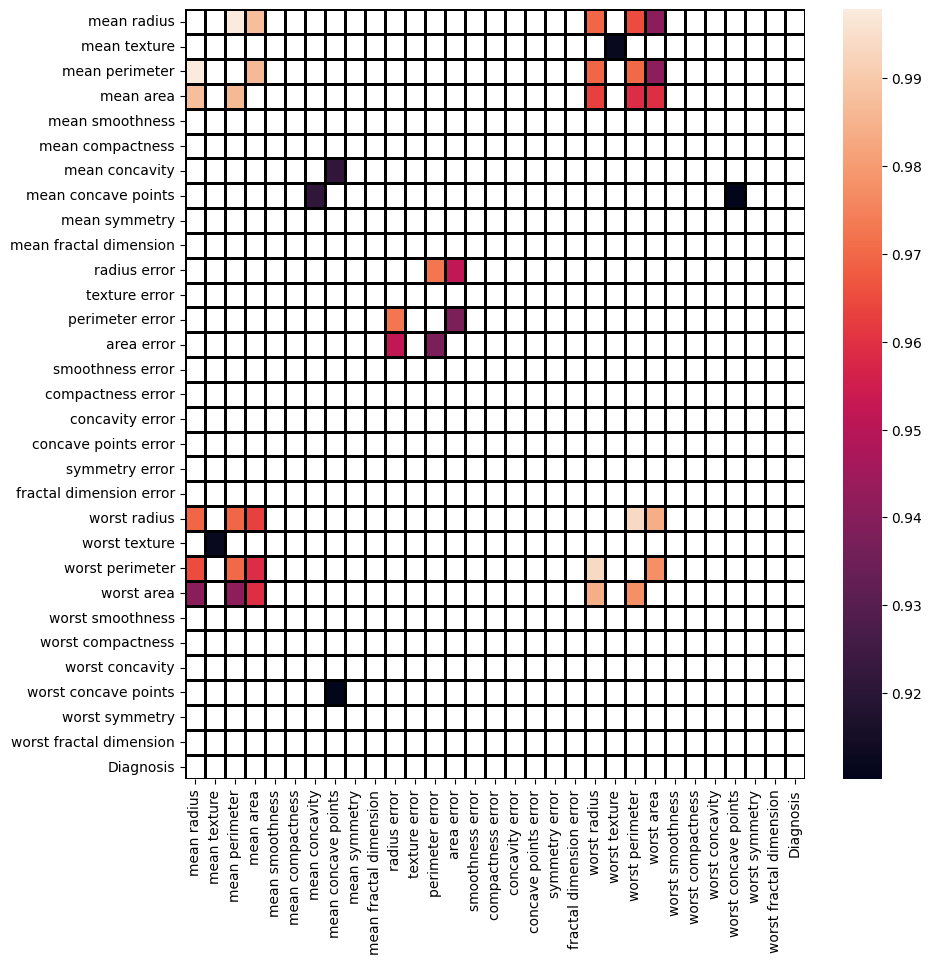

In [24]:
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10,10));
sns.heatmap(corr[(corr>0.9) & (corr != 1.0)], linewidths=1, linecolor='black');

In [25]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
clf_NB.fit(X_train, y_train)
clf_LD.fit(X_train, y_train)
clf_QD.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [27]:
y_pred_NB = clf_NB.predict(X_test)

In [28]:
report = classification_report(y_test, y_pred_NB)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [29]:
y_pred_LD = clf_LD.predict(X_test)
report = classification_report(y_test, y_pred_LD)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [30]:
y_pred_QD = clf_QD.predict(X_test)
report = classification_report(y_test, y_pred_QD)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114




# Printed Results Panels

Consolidated performance comparison of trained classification models.
All metrics are computed using the evaluation dataset defined in the modeling workflow.


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
1,Linear Discriminant,0.964912,0.943662,1.000000,0.971014,0.997142
0,Naive Bayes,0.929825,0.940299,0.940299,0.940299,0.989203
2,Quadratic Discriminant,0.956140,0.969697,0.955224,0.962406,0.975389


Selected Best Model: Linear Discriminant

Classification Report


              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix (Counts)
[[43  4]
 [ 0 67]]

Confusion Matrix (Normalized)
[[0.91489362 0.08510638]
 [0.         1.        ]]


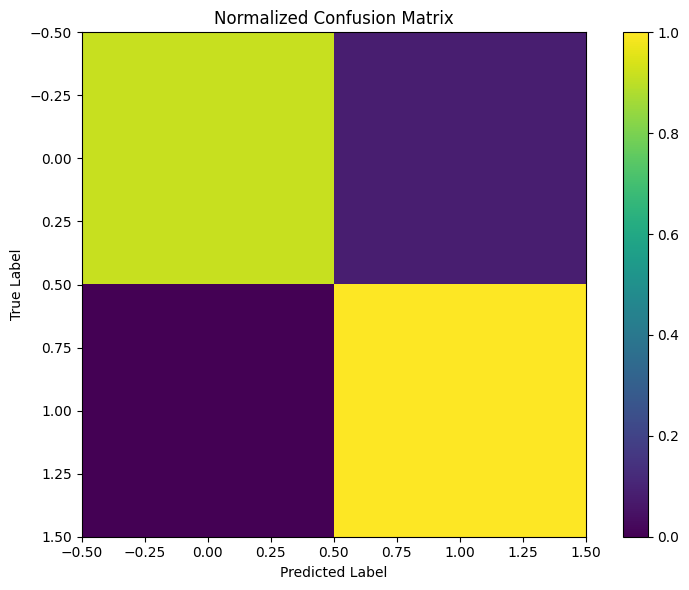

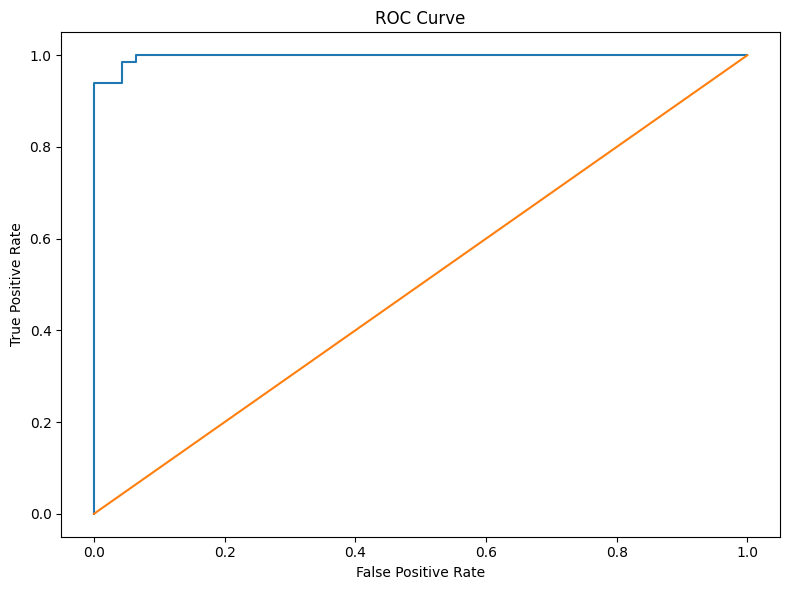

ROC-AUC: 0.9971419498253414


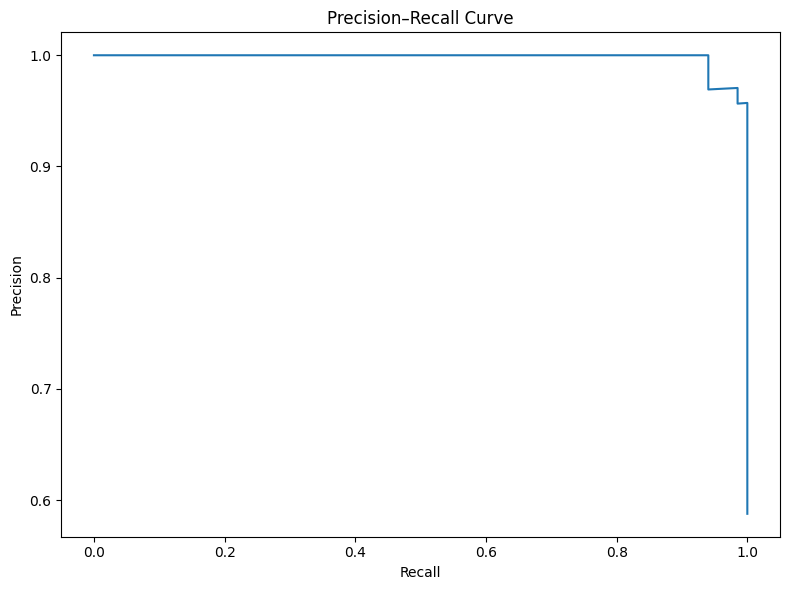

PR-AUC: 0.9980087764750359

Top Coefficients
19    441.248765
14   -175.201909
29   -102.832852
17   -100.571958
5      83.327235
18    -69.031943
16     54.086996
6     -35.823710
7     -26.813401
15    -26.791553
27    -20.534149
8     -17.346486
24    -16.280797
9      14.870558
10    -13.709898
dtype: float64


In [31]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    auc,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score
)

plt.rcParams["figure.figsize"] = (8, 6)

models = {}

if 'clf_NB' in globals():
    models["Naive Bayes"] = clf_NB
if 'clf_LD' in globals():
    models["Linear Discriminant"] = clf_LD
if 'clf_QD' in globals():
    models["Quadratic Discriminant"] = clf_QD

rows = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    row = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
        row["ROC-AUC"] = roc_auc_score(y_test, probs)
    rows.append(row)

comparison_df = pd.DataFrame(rows)

if "ROC-AUC" in comparison_df.columns:
    comparison_df = comparison_df.sort_values("ROC-AUC", ascending=False)
else:
    comparison_df = comparison_df.sort_values("F1 Score", ascending=False)

display(comparison_df)

best_model_name = comparison_df.iloc[0]["Model"]
best_model = models[best_model_name]

print("Selected Best Model:", best_model_name)

y_pred = best_model.predict(X_test)

print("\nClassification Report")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize="true")

print("Confusion Matrix (Counts)")
print(cm)

print("\nConfusion Matrix (Normalized)")
print(cm_norm)

plt.figure()
plt.imshow(cm_norm, interpolation="nearest")
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.tight_layout()
plt.show()

if hasattr(best_model, "predict_proba"):
    probs = best_model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.tight_layout()
    plt.show()

    print("ROC-AUC:", roc_auc)

    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    pr_auc = auc(recall, precision)

    plt.figure()
    plt.plot(recall, precision)
    plt.title("Precision–Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.tight_layout()
    plt.show()

    print("PR-AUC:", pr_auc)

if hasattr(best_model, "coef_"):
    coefs = pd.Series(best_model.coef_.flatten())
    coefs = coefs.sort_values(key=abs, ascending=False).head(15)

    print("\nTop Coefficients")
    print(coefs)
